## Task 2: Visualizing fire scars through false color

In [29]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr 

## Fire perimeter data exploration

In [30]:
# Import perimeter of eaton fire 
fp = os.path.join("data", "Eaton_Perimeter_20250121", "Eaton_Perimeter_20250121.shp")
eaton_boundary = gpd.read_file(fp)

# Import perimeter of palisades fire 
fp = os.path.join("data", "Palisades_Perimeter_20250121", "Palisades_Perimeter_20250121.shp")
palisades_boundary = gpd.read_file(fp)

In [31]:
# Examine CRS details of `eaton_boundary`
print(f"CRS of eaton_boundary: {eaton_boundary.crs}")
print('Datum', eaton_boundary.crs.datum)
print('Is geographic?', eaton_boundary.crs.is_geographic)
print('Is projected?', eaton_boundary.crs.is_projected)

CRS of eaton_boundary: EPSG:3857
Datum World Geodetic System 1984 ensemble
Is geographic? False
Is projected? True


In [32]:
# Examine CRS details of `palisades_boundary`
print(f"CRS of palisades_boundary: {palisades_boundary.crs}")
print('Datum', palisades_boundary.crs.datum)
print('Is geographic?', palisades_boundary.crs.is_geographic)
print('Is projected?', palisades_boundary.crs.is_projected)

CRS of palisades_boundary: EPSG:3857
Datum World Geodetic System 1984 ensemble
Is geographic? False
Is projected? True


## NetCDF data import and exploration

In [33]:
# Import landsat data using `xr.open_dataset()`
landsat = xr.open_dataset('data/landsat8-2025-02-23-palisades-eaton.nc')

Explore the data and write a brief summary of the information you obtained from the preliminary information. Your summary should include the a description of the data’s variables, dimensions, and coordinates.

In [34]:
landsat.info()

xarray.Dataset {
dimensions:
	y = 1418 ;
	x = 2742 ;

variables:
	float64 y(y) ;
		y:units = metre ;
		y:resolution = -30.0 ;
		y:crs = EPSG:32611 ;
		y:axis = Y ;
		y:long_name = y coordinate of projection ;
		y:standard_name = projection_y_coordinate ;
	float64 x(x) ;
		x:units = metre ;
		x:resolution = 30.0 ;
		x:crs = EPSG:32611 ;
		x:axis = X ;
		x:long_name = x coordinate of projection ;
		x:standard_name = projection_x_coordinate ;
	datetime64[ns] time() ;
	float32 red(y, x) ;
		red:grid_mapping = spatial_ref ;
	float32 green(y, x) ;
		green:grid_mapping = spatial_ref ;
	float32 blue(y, x) ;
		blue:grid_mapping = spatial_ref ;
	float32 nir08(y, x) ;
		nir08:grid_mapping = spatial_ref ;
	float32 swir22(y, x) ;
		swir22:grid_mapping = spatial_ref ;
	int64 spatial_ref() ;
		spatial_ref:crs_wkt = PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["

Varibales: 
Dimensions: 
Coordinates: 

## 4. Restoring Geospatial Information

In [35]:
# Using rio.crs to print CRS of the dataset
print(landsat.rio.crs)

None


In [36]:
# Geospatial information for dataset stored in `spatial_ref`
# Print CRS of `landsat` by accessing `spatial_ref.crs_wkt` attribute
print(landsat.spatial_ref.crs_wkt)

PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]


In [37]:
# Recover geospatial information by using `rio.write_crs()` and the spatial reference information 
landsat = landsat.rio.write_crs(landsat.spatial_ref.crs_wkt)

In [38]:
# Print the  CRS of updated `landsat` dataset 
print(landsat.rio.crs)

EPSG:32611


## 5. True Color Image 

In [40]:
landsat

<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
    spatial_ref  int64 8B 0
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


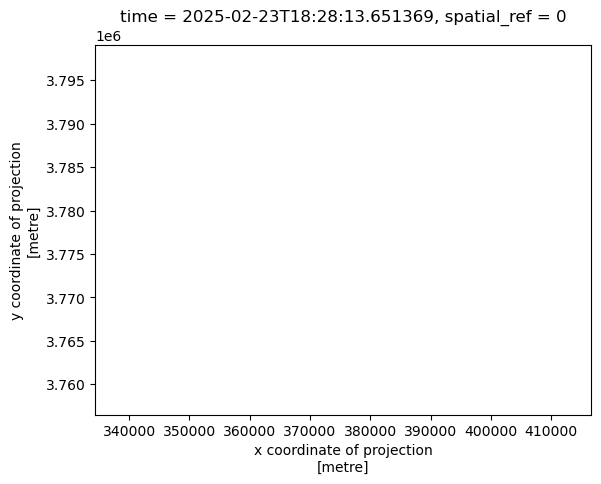

In [ ]:
# Select the red, green, and blue variables of the xarray.Dataset holding the Landsat data

landsat[['red','green','blue']].to_array().plot.imshow()


/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


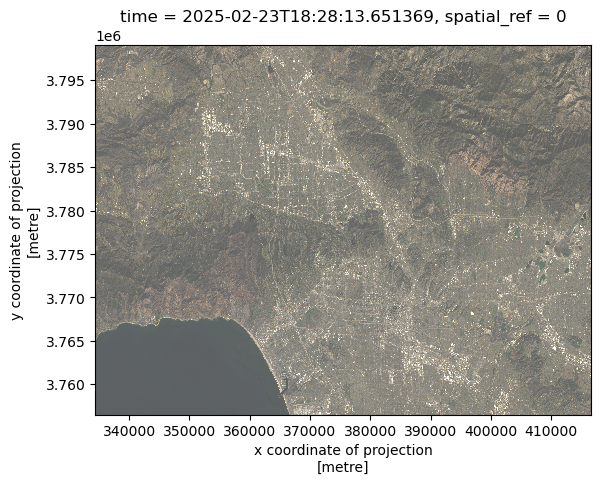

In [83]:
# Adjust the scale used for plotting the bands to get a true color image
landsat[['red','green','blue']].to_array().plot.imshow(vmin = 0, 
                                                       vmax = 20000, 
                                                       robust = True)

In [100]:
# Check if red band has nan values
np.isnan(landsat['red']).any()

<xarray.DataArray 'red' ()> Size: 1B
array(False)
Coordinates:
    time         datetime64[ns] 8B 2025-02-23T18:28:13.651369
    spatial_ref  int64 8B 0

In [101]:
# Check if green band has na values 
np.isnan(landsat['green']).any()

<xarray.DataArray 'green' ()> Size: 1B
array(True)
Coordinates:
    time         datetime64[ns] 8B 2025-02-23T18:28:13.651369
    spatial_ref  int64 8B 0

In [102]:
# Check if blue band has nan values 
np.isnan(landsat['blue']).any()

<xarray.DataArray 'blue' ()> Size: 1B
array(True)
Coordinates:
    time         datetime64[ns] 8B 2025-02-23T18:28:13.651369
    spatial_ref  int64 8B 0

In [ ]:
# Using .fillna() to substitute the nan values with 0 
landsat['green'] = landsat['green'].fillna(0)
landsat['blue'] = landsat['blue'].fillna(0)

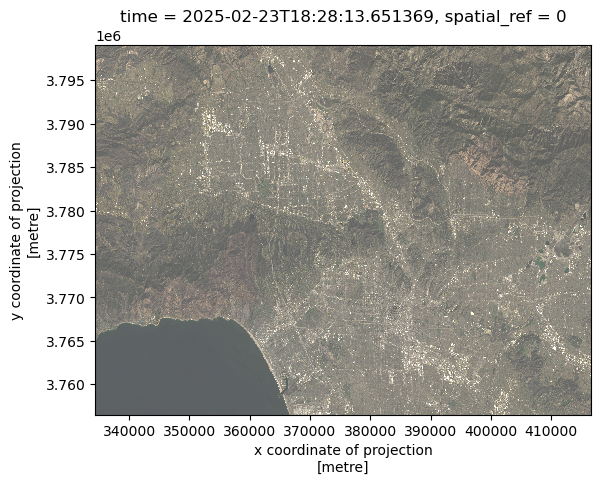

In [ ]:
# Plot new true color image without warnings 
landsat[['red','green','blue']].to_array().plot.imshow(vmin = 0, 
                                                       vmax = 20000, 
                                                       robust = True)

#f 
Comparing the ouputs for parts (a) and (e).

